In [2]:
!pip install prophet


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [3]:
import pandas as pd
from prophet import Prophet
import datetime
from itertools import cycle

import seaborn as sn
import matplotlib.pyplot as plt

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [4]:
df_BTC = pd.read_csv('final_BTCUSDT.csv')
df_BTC.head()

,open_time,close_time,open,high,low,close,volume,quote_asset_volume,num_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore,open_timestamp,close_timestamp,symbol,currency
0,"12/31/2021, 23:00:00","12/31/2021, 23:59:59",46303.98,46520.13,46132.04,46216.93,985.99762,4.571976e+07,29555,484.09229,2.244919e+07,0,1640991600000,1640995199999,BTC,USDT
1,"12/31/2021, 22:00:00","12/31/2021, 22:59:59",46333.87,46569.97,46232.36,46303.99,991.85142,4.600406e+07,36280,447.96605,2.077702e+07,0,1640988000000,1640991599999,BTC,USDT
2,"12/31/2021, 21:00:00","12/31/2021, 21:59:59",45886.66,46513.67,45766.85,46333.86,1734.69585,7.997065e+07,54579,972.44065,4.482430e+07,0,1640984400000,1640987999999,BTC,USDT
3,"12/31/2021, 20:00:00","12/31/2021, 20:59:59",45728.28,46211.07,45678.00,45879.24,1831.41202,8.422142e+07,51300,997.72369,4.588270e+07,0,1640980800000,1640984399999,BTC,USDT
4,"12/31/2021, 19:00:00","12/31/2021, 19:59:59",46686.42,46688.68,45678.96,45728.28,3851.30902,1.776171e+08,87472,1691.64542,7.803749e+07,0,1640977200000,1640980799999,BTC,USDT


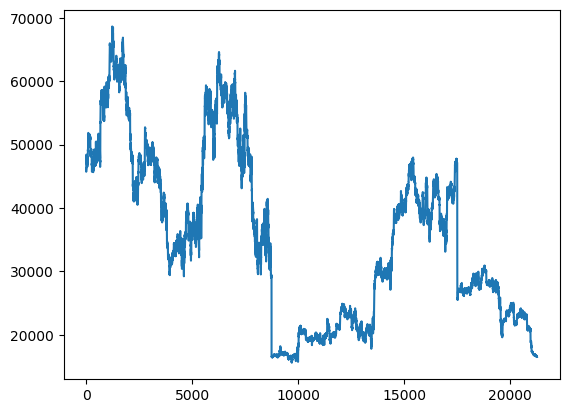

In [5]:
df_BTC['close'].plot.line()
plt.show()

In [6]:
len(df_BTC)

21274

In [7]:
df_BTC['close_datetime'] = pd.to_datetime(df_BTC['close_time'])

In [9]:
df_BTC = df_BTC.sort_values(by = ['close_datetime']).reset_index(drop=True)

In [ ]:
### Model Training and Calibration

In [ ]:
# '''SPARK UDF - PROPHET'''

# @pandas_udf(schema, functionType=PandasUDFType.GROUPED_MAP)
# def fit_pandas_udf(inp_df):
#     """
#     :param df: Dataframe (train + test data)
#     :return: predictions as defined in the output schema
#     """
#     inp_df = inp_df.sort_values(['shop_id', 'item_id', 'date'])
#     try:
#         store = inp_df['shop_id'].iloc[0]
#         product = inp_df['item_id'].iloc[0]
#         train = inp_df
#         test = future_dates
#         test['shop_id'] = store
#         test['item_id'] = product
#         train = train.sort_values(['shop_id', 'item_id', 'date'])
#         test = test.sort_values(['shop_id', 'item_id', 'date'])

#         train_dataset= pd.DataFrame()
#         train_dataset['ds'] = train['date']
#         train_dataset['y']= train[['item_cnt_day']]
#         train_dataset['Monday']= train['Monday']
#         train_dataset['Tuesday']= train['Tuesday']
#         train_dataset['Wednesday']= train['Wednesday']
#         train_dataset['Thursday']= train['Thursday']
#         train_dataset['Friday']= train['Friday']
#         train_dataset['Saturday']= train['Saturday']
#         train_dataset['Sunday']= train['Sunday']

#         '''Setting the CAP & saturating forecast for training data'''
#         cap_train = train_dataset.loc[train_dataset['y'].idxmax()]
#         floor_train = train_dataset.loc[train_dataset['y'].idxmin()]

#         train_dataset['cap'] = cap_train['y']
#         train_dataset['floor'] = floor_train['y']
#         holiday_df = holiday_master()


#         pro_regressor = (Prophet(n_changepoints=100,
#                                     daily_seasonality=True,
#                                     weekly_seasonality=True,
#                                     seasonality_mode='additive',
#                                     interval_width=0.2,
#                                     holidays= holiday_df ,
#                                     holidays_prior_scale=50,
#                                     yearly_seasonality= 65,
#                                     growth = 'logistic'
#                                      ).add_seasonality(name='daily', period=365.5,
#                                                        fourier_order=15
#                                                       )
#                                      .add_seasonality(name='monthly',
#                                                      period=30.5,
#                                                      fourier_order=5))

#         pro_regressor.add_regressor('Monday')
#         pro_regressor.add_regressor('Tuesday')
#         pro_regressor.add_regressor('Wednesday')
#         pro_regressor.add_regressor('Thursday')
#         pro_regressor.add_regressor('Friday')
#         pro_regressor.add_regressor('Saturday')
#         pro_regressor.add_regressor('Sunday')

#         pro_regressor.fit(train_dataset)

#         test_dataset= pd.DataFrame()
#         test_dataset['ds'] = test['date']
#         test_dataset['Monday']= test['Monday']
#         test_dataset['Tuesday']= test['Tuesday']
#         test_dataset['Wednesday']= test['Wednesday']
#         test_dataset['Thursday']= test['Thursday']
#         test_dataset['Friday']= test['Friday']
#         test_dataset['Saturday']= test['Saturday']
#         test_dataset['Sunday']= test['Sunday']

#         test_dataset['cap'] = cap_train['y']*0.8
#         test_dataset['floor'] = floor_train['y']


#         forecast_data = pro_regressor.predict(test_dataset)

#         forecast = forecast_data[['ds','yhat']]
#         forecast.rename(columns={'ds':'date','yhat':'predicted_sales'}, inplace=True)

#     except:
#         forecast= pd.DataFrame()
#         forecast['Date'] = inp_df['Date']
#         forecast['predicted_sellout'] = 999999

        
#     final = test.merge(forecast, on = ['date'], how='left')
#     final = final.sort_values('date')
#     final['predicted_sales'] = np.where(final['predicted_sales']<0,0,final['predicted_sales'])
#     final = final[['shop_id', 'item_id', 'date','predicted_sales']]
#     final = final.sort_values(['shop_id', 'item_id', 'date'])
    
#     return pd.DataFrame(final, columns=schema.fieldNames())

In [10]:
df_BTC_fbp = df_BTC[['close_datetime', 'close']].rename(columns={"close_datetime": "ds", "close": "y"})

In [11]:
df_BTC_fbp.head()

,ds,y
0,2021-01-01 00:59:59,28995.13
1,2021-01-01 01:59:59,29409.99
2,2021-01-01 02:59:59,29194.65
3,2021-01-01 03:59:59,29278.40
4,2021-01-01 04:59:59,29220.31


In [118]:
df_BTC_train = df_BTC_fbp[df_BTC_fbp['ds'] < df_BTC_fbp.ds.max() - datetime.timedelta(days = 60)]
df_BTC_test = df_BTC_fbp[df_BTC_fbp['ds'] >= df_BTC_fbp.ds.max() - datetime.timedelta(days = 60)]

In [78]:
# df_BTC_fbp = df_BTC[['volume', 'taker_buy_base_asset_volume', 'num_trades','close_datetime', 'close']].rename(columns={"close_datetime": "ds", "close": "y"})

In [83]:
df_BTC_train = df_BTC_fbp[df_BTC_fbp['ds'] < df_BTC_fbp.ds.max() - datetime.timedelta(days = 60)]
df_BTC_test = df_BTC_fbp[df_BTC_fbp['ds'] >= df_BTC_fbp.ds.max() - datetime.timedelta(days = 60)]

In [120]:
pro_regressor = (Prophet(n_changepoints=200,
#                                     daily_seasonality=True,
#                                     weekly_seasonality=True,
#                                     seasonality_mode='additive',
#                                     interval_width=0.2,
#                                     yearly_seasonality= 65,
#                                     growth = 'logistic'
#                                      ).add_seasonality(name='daily', period=365.5,
#                                                        fourier_order=15
#                                                       )
#                                      .add_seasonality(name='monthly',
#                                                      period=30.5,
#                                                      fourier_order=5)
                ))


In [85]:
# pro_regressor.add_regressor('volume')
# pro_regressor.add_regressor('taker_buy_base_asset_volume')
# pro_regressor.add_regressor('num_trades')

In [68]:
# cap_train = df_BTC_fbp.loc[df_BTC_fbp['y'].idxmax()]
# floor_train = df_BTC_fbp.loc[df_BTC_fbp['y'].idxmin()]

# df_BTC_fbp['cap'] = cap_train['y']
# df_BTC_fbp['floor'] = floor_train['y']

In [121]:
pro_regressor.fit(df_BTC_train)

14:39:04 - cmdstanpy - INFO - Chain [1] start processing
14:41:51 - cmdstanpy - INFO - Chain [1] done processing


In [23]:
future.head()

,ds
0,2021-01-01 00:00:00
1,2021-01-01 01:00:00
2,2021-01-01 02:00:00
3,2021-01-01 03:00:00
4,2021-01-01 04:00:00


In [ ]:
# sellout_pred_viz = sellout_pred.orderBy('shop_id', 'item_id', 'date')

# actuals = [val.item_cnt_day for val in sellout_pred_viz.select('item_cnt_day').collect()]
# predictions = [val.predicted_sales for val in sellout_pred_viz.select('predicted_sales').collect()]
# dates = [val.date for val in sellout_pred_viz.select('date').collect()]

# plt.figure(figsize=(30,15))
# plt.title("Historicals v Forecasts",fontsize='20')
# plt.plot(dates, actuals, label = 'Actuals')
# plt.plot(dates, predictions, label = 'Predictions', color='g')
# plt.legend(loc='best', fontsize='20')
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)

In [122]:
forecast = pro_regressor.predict(df_BTC_test)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail().rename(columns = {"ds": "close_datetime"})

,close_datetime,yhat,yhat_lower,yhat_upper
1435,2023-04-07 18:59:59,31066.785957,14060.928308,46770.717970
1436,2023-04-07 19:59:59,31063.958360,14347.903327,46351.974686
1437,2023-04-07 20:59:59,31063.914670,13761.375388,46248.853185
1438,2023-04-07 21:59:59,31067.500225,14137.440673,46530.445990
1439,2023-04-07 22:59:59,31073.310943,13658.670820,46554.354359


In [123]:
df_BTC_full = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].rename(columns = {"ds": "close_datetime"}).merge(df_BTC, how = 'outer', on = 'close_datetime')

In [138]:
df_BTC_full.tail()

,close_datetime,yhat,yhat_lower,yhat_upper,open_time,close_time,open,high,low,close,volume,quote_asset_volume,num_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore,open_timestamp,close_timestamp,symbol,currency
1435,2023-04-07 18:59:59,31066.785957,14060.928308,46770.717970,"04/07/2023, 18:00:00","04/07/2023, 18:59:59",27911.50,27930.00,27874.13,27891.77,556.90925,1.553985e+07,18130,232.39127,6.483970e+06,0,1680890400000,1680893999999,BTC,USDT
1436,2023-04-07 19:59:59,31063.958360,14347.903327,46351.974686,"04/07/2023, 19:00:00","04/07/2023, 19:59:59",27891.76,27905.15,27869.26,27897.52,531.37925,1.482009e+07,15655,247.30083,6.896883e+06,0,1680894000000,1680897599999,BTC,USDT
1437,2023-04-07 20:59:59,31063.914670,13761.375388,46248.853185,"04/07/2023, 20:00:00","04/07/2023, 20:59:59",27897.51,27922.99,27839.02,27864.20,695.57851,1.939375e+07,19005,295.59602,8.240382e+06,0,1680897600000,1680901199999,BTC,USDT
1438,2023-04-07 21:59:59,31067.500225,14137.440673,46530.445990,"04/07/2023, 21:00:00","04/07/2023, 21:59:59",27864.21,27909.27,27858.30,27891.13,445.55868,1.242284e+07,17014,232.01269,6.468415e+06,0,1680901200000,1680904799999,BTC,USDT
1439,2023-04-07 22:59:59,31073.310943,13658.670820,46554.354359,"04/07/2023, 22:00:00","04/07/2023, 22:59:59",27891.13,27980.74,27864.99,27955.99,953.10882,2.661461e+07,25132,512.41781,1.430764e+07,0,1680904800000,1680908399999,BTC,USDT


In [134]:
df_BTC_full = df_BTC_full.sort_values('close_datetime')
df_BTC_full.tail()

,close_datetime,yhat,yhat_lower,yhat_upper,open_time,close_time,open,high,low,close,volume,quote_asset_volume,num_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore,open_timestamp,close_timestamp,symbol,currency
1435,2023-04-07 18:59:59,31066.785957,14060.928308,46770.717970,"04/07/2023, 18:00:00","04/07/2023, 18:59:59",27911.50,27930.00,27874.13,27891.77,556.90925,1.553985e+07,18130,232.39127,6.483970e+06,0,1680890400000,1680893999999,BTC,USDT
1436,2023-04-07 19:59:59,31063.958360,14347.903327,46351.974686,"04/07/2023, 19:00:00","04/07/2023, 19:59:59",27891.76,27905.15,27869.26,27897.52,531.37925,1.482009e+07,15655,247.30083,6.896883e+06,0,1680894000000,1680897599999,BTC,USDT
1437,2023-04-07 20:59:59,31063.914670,13761.375388,46248.853185,"04/07/2023, 20:00:00","04/07/2023, 20:59:59",27897.51,27922.99,27839.02,27864.20,695.57851,1.939375e+07,19005,295.59602,8.240382e+06,0,1680897600000,1680901199999,BTC,USDT
1438,2023-04-07 21:59:59,31067.500225,14137.440673,46530.445990,"04/07/2023, 21:00:00","04/07/2023, 21:59:59",27864.21,27909.27,27858.30,27891.13,445.55868,1.242284e+07,17014,232.01269,6.468415e+06,0,1680901200000,1680904799999,BTC,USDT
1439,2023-04-07 22:59:59,31073.310943,13658.670820,46554.354359,"04/07/2023, 22:00:00","04/07/2023, 22:59:59",27891.13,27980.74,27864.99,27955.99,953.10882,2.661461e+07,25132,512.41781,1.430764e+07,0,1680904800000,1680908399999,BTC,USDT


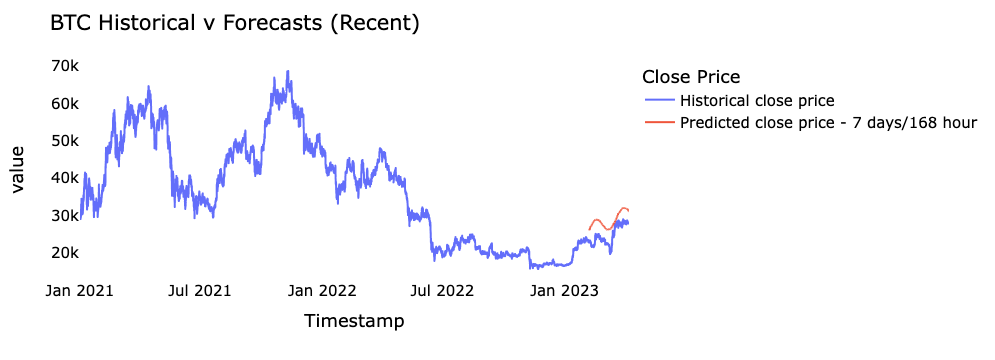

In [135]:
names = cycle(['Historical close price', 'Predicted close price - 7 days/168 hour'])

fig = px.line(df_BTC_full, x=df_BTC_full.close_datetime, y=[df_BTC_full['close'], df_BTC_full['yhat']],
              labels={'close': 'Stock close price','close_datetime': 'Timestamp'})
fig.update_layout(title_text='BTC Historical v Forecasts (Recent)',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)